Step 1: Deciding (not) to Segment

McDonald's has two options when it comes to market segmentation. They can either choose to believe that they serve the entire market and there is no need to understand the differences among consumers, or they can recognize the value in studying the variations among consumers and use that knowledge to implement a differentiated marketing approach.

Step 2: Specifying the Ideal Target Segment

 McDonald's must decide whether to segment the market or not. If they do, they need to find an attractive segment that is homogeneous, distinct, sizable, compatible with McDonald's strengths, identifiable, and reachable. The target segment should have a positive perception of McDonald's, frequent eating out, and a liking for fast food. They may also want to explore segments with negative perceptions. The available data focuses on people's brand image, so the attractiveness criteria are liking McDonald's and frequent consumption, which will guide the selection of the target segment.

Step 3: Collecting Data

To collect data, a survey was conducted with 1453 adult Australian consumers. They were asked about their perceptions of McDonald's regarding various attributes like taste, convenience, healthiness, price, etc. They could respond with a "yes" if they believed McDonald's had that attribute or "no" if they didn't. The survey also included questions about their age and gender. In a real market segmentation study, additional information such as dining behavior and information sources would be collected for a more detailed understanding of each market segment.






Step 4: Exploring Data
We begin by loading the dataset and examining its basic features. We look at the variable names, sample size, and the first three rows of the data. From the first respondent's data, we can see their perceptions of McDonald's attributes, their preference for McDonald's, age, frequency of dining at McDonald's, and gender. The perception variables are currently coded using words (YES/NO), which is not suitable for segmentation analysis. We convert these variables into numeric binary format (1 for YES, 0 for NO) to make them suitable for analysis. After the conversion, we find that approximately 55% of respondents perceive McDonald's as YUMMY, 91% find it CONVENIENT, and only 9% consider it SPICY.

In [33]:
import pandas as pd
mcdonalds = pd.read_csv('mcdonalds.csv')
column_names = mcdonalds.columns
print(column_names)
import numpy as np

# Convert the selected columns of the DataFrame to a matrix
MD_x = np.array(mcdonalds.iloc[:, 0:11])

# Create a mask for "Yes" values
yes_mask = (MD_x == "Yes")

# Convert "Yes" to 1 and "No" to 0 using the mask
MD_x[yes_mask] = 1
MD_x[~yes_mask] = 0

# Calculate the column means and round them to 2 decimal places
column_means = np.round(np.mean(MD_x.astype(float), axis=0), 2)

print(column_means)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


It will indicate that 55% of the people say it is yummy, 91% of the people tell that it is convineint, 9% of the people say that it is spicy

In [34]:
print(yes_mask)
print(MD_x)
print(MD_x[yes_mask])
print(MD_x[~yes_mask])
print(MD_x

SyntaxError: unexpected EOF while parsing (1725772806.py, line 5)

To create a perceptual map and understand how attributes are rated by respondents, we use a technique called principal components analysis. This helps us identify patterns and relationships among the attributes. We use unstandardized data because our variables are binary.

In [35]:
#it is reducing the dimension

from sklearn.decomposition import PCA

# Perform PCA on the MD_x matrix
pca = PCA()
MD_pca = pca.fit_transform(MD_x) # data after tranforming
MD_p=pca.fit(MD_x) # model after fitting

# Get the standard deviation, proportion of variance, and cumulative proportion
std_dev = np.round(np.sqrt(pca.explained_variance_), 5)
prop_var = np.round(pca.explained_variance_ratio_, 5)
cum_var = np.round(np.cumsum(prop_var), 5)

# Print the summary of PCA results
print("Importance of components:")
for i in range(len(std_dev)):
    print(f"PC{i+1}", std_dev[i])

print("Proportion of Variance:")
for i in range(len(prop_var)):
    print(f"PC{i+1}", prop_var[i])

print("Cumulative Proportion:")
for i in range(len(cum_var)):
    print(f"PC{i+1}", cum_var[i])


Importance of components:
PC1 0.75705
PC2 0.60746
PC3 0.50462
PC4 0.3988
PC5 0.33741
PC6 0.31027
PC7 0.2897
PC8 0.27512
PC9 0.26525
PC10 0.24884
PC11 0.2369
Proportion of Variance:
PC1 0.29945
PC2 0.1928
PC3 0.13305
PC4 0.0831
PC5 0.05948
PC6 0.0503
PC7 0.04385
PC8 0.03955
PC9 0.03676
PC10 0.03235
PC11 0.02932
Cumulative Proportion:
PC1 0.29945
PC2 0.49225
PC3 0.6253
PC4 0.7084
PC5 0.76788
PC6 0.81818
PC7 0.86203
PC8 0.90158
PC9 0.93834
PC10 0.97069
PC11 1.00001


In [36]:

load = (pca.components_)
i=0
rot_matrix = MD_p.components_.T # tranforming because we are converting 
columns=[]
for i in range(11):
    i=i+1
    columns.append("PC{}".format(i))

rot_df = pd.DataFrame(rot_matrix, index=['yummy', 'convenient','spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 ], columns=columns)
rot_df=round(-rot_df,3)
rot_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


In [37]:
# by the above we can say that 50% of the information is present in the first 2 components

In [38]:
print(MD_p.components_.T)

[[-0.47693349  0.36378978 -0.30444402  0.0551622  -0.30753507  0.17073819
  -0.28051863  0.01304117  0.57240278 -0.11028437  0.04543901]
 [-0.15533159  0.016414   -0.0625153  -0.14242496  0.27760805 -0.34783006
  -0.05973793 -0.11307868 -0.01846534 -0.66581756 -0.54161635]
 [-0.00635636  0.01880869 -0.03701866  0.19761927  0.07062017 -0.3550866
   0.70763705  0.37593402  0.40027977 -0.07563413  0.14172992]
 [ 0.11623168 -0.03409395 -0.32235949 -0.35413876 -0.07340475 -0.40651542
  -0.38594277  0.58962241 -0.16051227 -0.00533813  0.25090987]
 [ 0.3044427  -0.06383884 -0.80237317  0.2539601   0.36139895  0.20934711
   0.03616962 -0.13824084 -0.00284738  0.00870725  0.00164229]
 [-0.10849325 -0.0869722  -0.06464172 -0.09736269  0.10793025 -0.59463206
  -0.08684577 -0.62779877  0.16619659  0.23953197  0.33926454]
 [-0.33718593 -0.61063276 -0.14931026  0.11895823 -0.12897259 -0.10324067
  -0.04044934  0.14006047  0.07606907  0.42808739 -0.48928285]
 [-0.47151394  0.3073178  -0.28726479 -0.0

In [39]:
# from bioinfokit.visuz import cluster
# cluster.biplot(cscore=MD_pca, loadings=-load, labels=mcdonalds.columns.values,var1=0,var2=0, show=True, dim=(10, 10))


 Step 5: Extracting Segments
 
 This code uses the K-means clustering algorithm to perform segmentation analysis. It calculates and plots the sum of within-cluster distances for different numbers of segments to determine the optimal number of segments for the analysis.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


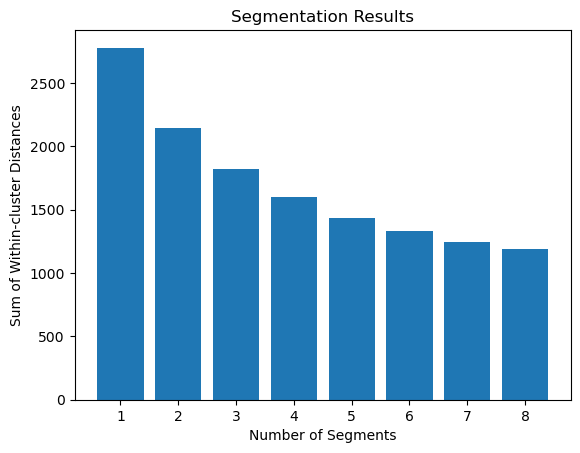

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

np.random.seed(1234)
 Step 5: Extracting Segments
nrep = 10
num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD_x)
    within_cluster_distances.append(kmeans.inertia_)
    MD_km28[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of Segments")
plt.ylabel("Sum of Within-cluster Distances")
plt.title("Segmentation Results")
plt.show()


ability-based data structure analysis using bootstrap resampling to determine the optimal number of segments for market segmentation.

In [57]:
MD_km28['1']


KMeans(n_clusters=1, random_state=1234)

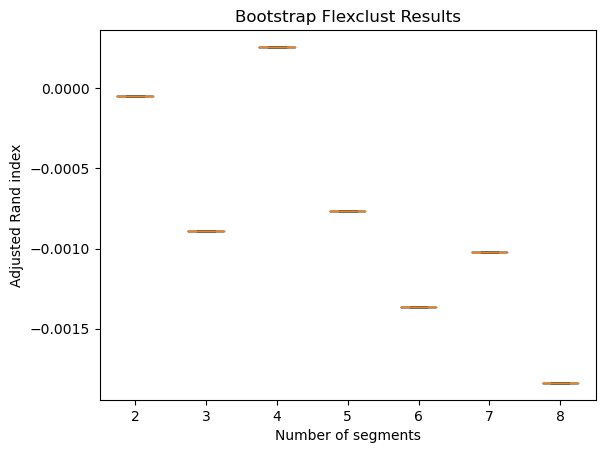

In [42]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

np.random.seed(1234)

nrep = 10
nboot = 100
num_segments = range(2, 9)
adjusted_rand_indices = []

# Perform K-means clustering on the original data
kmeans_original = KMeans(n_clusters=8, n_init=nrep, random_state=1234)
kmeans_original.fit(MD_x)
original_labels = kmeans_original.labels_

bootstrap_results = []

for k in num_segments:
    rand_indices = []
    for _ in range(nboot):
        # Perform bootstrapping by resampling the data
        boot_samples = resample(MD_x, random_state=1234)
        
        # Perform K-means clustering on bootstrapped samples
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
        kmeans.fit(boot_samples)
        labels = kmeans.labels_
        
        # Calculate the adjusted Rand index using the original labels as "ground truth"
        rand_index = adjusted_rand_score(original_labels, labels)
        rand_indices.append(rand_index)
    
    bootstrap_results.append(rand_indices)

# Create a box plot of the adjusted Rand indices
plt.boxplot(bootstrap_results, labels=num_segments)
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.title('Bootstrap Flexclust Results')
plt.show()


MD_km28[str(i)].transform(MD).min(axis=1) calculates the minimum similarity between each data point in MD and the centroids of the i-th cluster using the K-means model MD_km28[str(i)]. The resulting array represents the minimum similarity values for each data point, indicating their proximity to the closest centroid in the cluster.

1 similarity: [1.30933422 1.12591918 1.7278655  ... 1.23215672 1.54045233 1.78140572]
1 labels: [0 0 0 ... 0 0 0]
2 similarity: [1.18700649 1.03060963 1.83763118 ... 1.12682984 1.27986291 1.28015113]
2 labels: [1 0 0 ... 0 0 1]
3 similarity: [1.18597615 1.07941087 1.53261594 ... 0.71489424 1.13475051 1.3141637 ]
3 labels: [2 1 1 ... 1 0 2]
4 similarity: [1.24673527 1.03985095 1.5374751  ... 0.71404582 1.09351457 0.92529184]
4 labels: [1 3 3 ... 3 0 2]


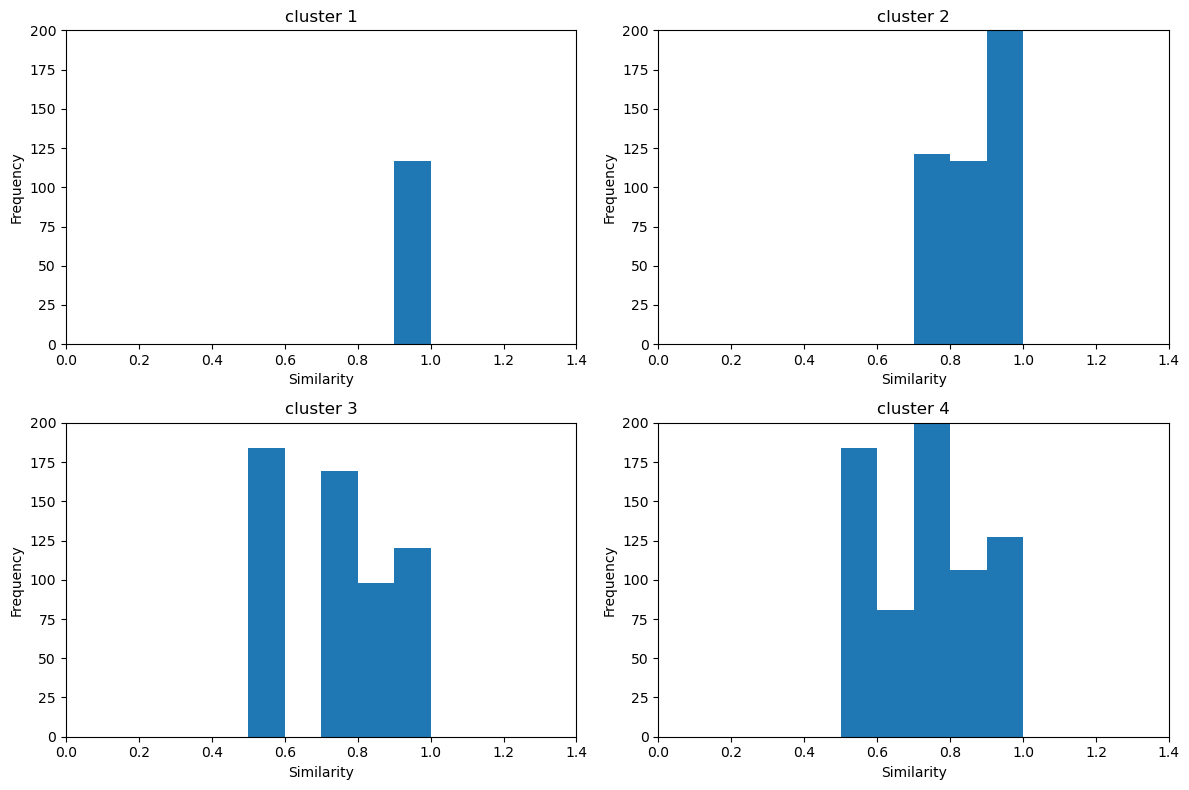

In [43]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200


fig, axs = plt.subplots(2, 2, figsize=(12, 8))


for i in range(1, 5):
    labels = MD_km28[str(i)].predict(MD_x)
    similarities = MD_km28[str(i)].transform(MD_x).min(axis=1)
    print(i,'similarity:',similarities)
    print(i,'labels:',labels)

    
    row = (i - 1) // 2
    col = (i - 1) % 2

    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('cluster {}'.format(i))

    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)


    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0,1.2,1.4])

plt.tight_layout()
plt.show()

The analysis of the SLSA plot and the overall evaluation of the four-segment solution suggest the following:

Segments 2, 3, and 4 in the four-segment solution are quite similar and remain stable even when the number of segments changes. This indicates that these segments represent consistent and reliable patterns in the data.

However, segment 1 in the four-segment solution is different from segments in solutions with fewer or more segments. It seems to be a bit unstable, as it takes members from two segments in the three-segment solution and splits into two segments in the five-segment solution.

The lack of stability in segment 1 raises concerns about its reliability as a target segment. It might not represent a distinct and consistent group in the market, making it less useful for targeted marketing strategies.

Overall, the four-segment solution seems to be a good choice for market segmentation as a whole, but it's important to be cautious with segment 1 due to its lack of stability. Other segments (2, 3, and 4) are more reliable and can provide valuable insights for marketing decisions.
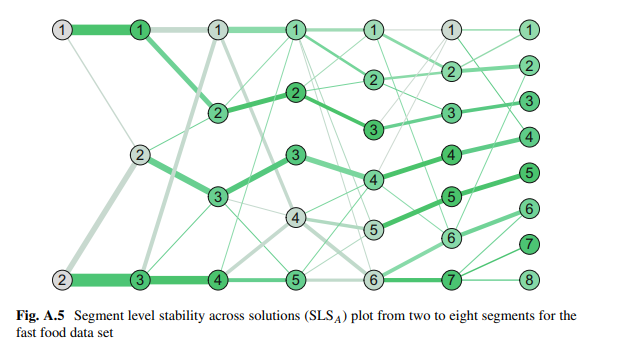



Afer this we are going save to 4 segment model for further use


In [44]:
MD_k4 = MD_km28['4']


Global stability refers to the overall stability of a segmentation solution, which assesses how consistent the solution is when the analysis is repeated using different subsets of the data. However, it doesn't provide information about the stability of individual segments within the solution.

To evaluate the stability of each segment, we calculate the segment level stability within the solution using a method called SLSW (segment level stability within solutions). In this case, we calculate the SLSW for the four-segment solution (MD.k4) using the data (MD.x) as input.

We can visualize the segment level stability using a plot. The y-axis represents the stability values, ranging from 0 to 1, while the x-axis represents the segment number. By plotting the SLSW results with customized labels for the axes, we can observe the stability of each segment within the four-segment solution.

Figure A.6 illustrates the segment level stability within the four-segment solution. Segment 1 exhibits the lowest stability across different replications, followed by segments 4 and 2. On the other hand, segment 3 shows the highest stability. The low stability levels observed for segment 1 align with the earlier observation of its lack of stability when comparing segment level stability across different solutions (see Fig. A.5
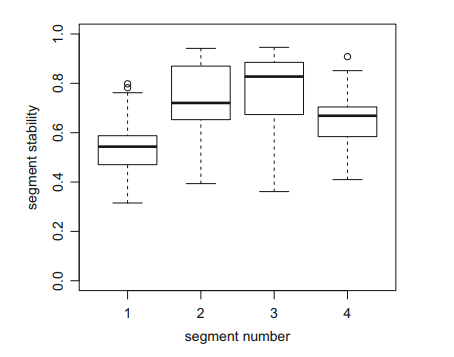

 Using Mixtures of Distributions

In [47]:
from scipy.stats import entropy

np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD.values)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = MD.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy
    
    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(MD_m28)

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     6       True  2   2 -2145.503727  4295.007454  4305.570225  4304.904547
1    18       True  3   3 -1819.760124  3645.520247  3661.364404  3660.283376
2    13       True  4   4 -1603.020916  3214.041831  3235.167374  3233.822143
3    10       True  5   5 -1434.610417  2879.220835  2905.627763  2904.035975
4     8       True  6   6 -1331.896202  2675.792404  2707.480718  2705.715191
5    10       True  7   7 -1247.102133  2508.204266  2545.173966  2543.249651
6    11       True  8   8 -1186.873546  2389.747091  2431.998177  2429.996533



iter: The number of iterations taken by the K-means algorithm to converge for a particular value of k (number of clusters).
converged: A boolean value indicating whether the K-means algorithm converged (True) or not (False).

k: The chosen value of k (number of clusters) for the K-means algorithm.

k0: An additional value of k that might have been used during the K-means algorithm.

logLik: The log-likelihood of the K-means model.

AIC (Akaike Information Criterion): A measure of the relative quality of a statistical model, which penalizes complex models. It is calculated as -2 * log_likelihood + 2 * k.

BIC (Bayesian Information Criterion): Another measure of model quality that balances goodness of fit and model complexity. It is calculated as -2 * log_likelihood + np.log(n_samples) * k, where n_samples is the number of samples in the dataset.

ICL (Integrated Completed Likelihood): A criterion that combines the BIC with the entropy of the class distribution. It is calculated as BIC - class_entropy, where class_entropy is the entropy of the class probabilities.

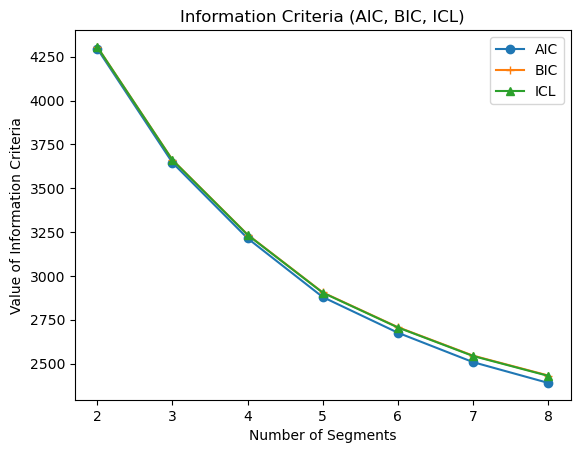

In [48]:
num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='+', label='BIC')
plt.plot(num_segments, ICL_values, marker='^', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()


plt.show()

The plot of the information criteria (AIC, BIC, and ICL) in Figure helps us choose the appropriate number of segments for the market segmentation. As we can observe, the values of all information criteria decrease significantly until we reach four segments (market segments).

Step 6: Profiling Segments

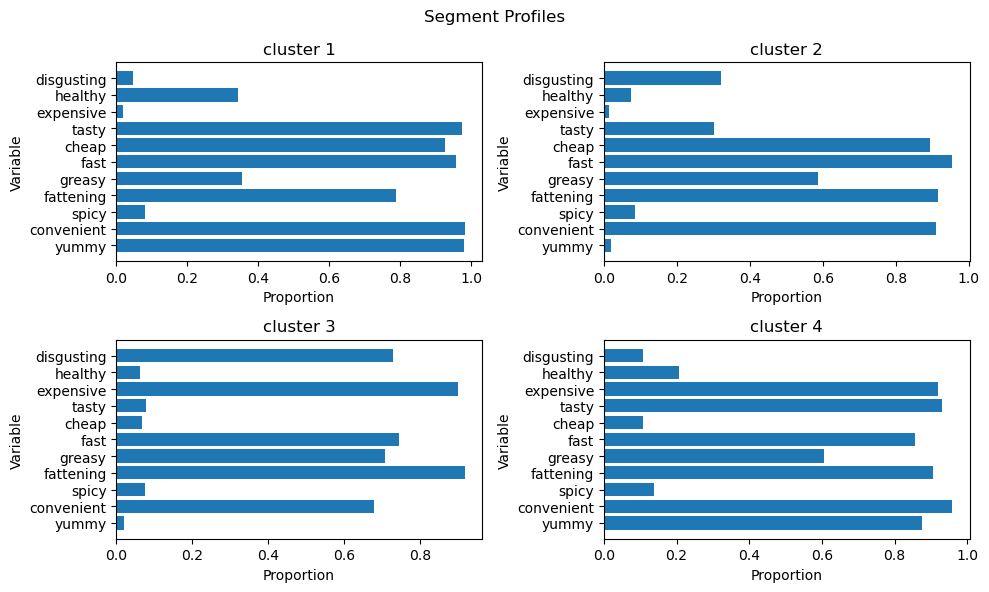

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

kmeans = MD_km28['4']
labels = kmeans.labels_
MD_mean = MD.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))

variables = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

axs[0, 0].barh(range(len(variables)), MD_mean.iloc[0])
axs[0, 0].set_yticks(range(len(variables)))
axs[0, 0].set_yticklabels(variables)
axs[0, 0].set_title('cluster 1')

axs[0, 1].barh(range(len(variables)), MD_mean.iloc[1])
axs[0, 1].set_yticks(range(len(variables)))
axs[0, 1].set_yticklabels(variables)
axs[0, 1].set_title('cluster 2')

axs[1, 0].barh(range(len(variables)), MD_mean.iloc[2])
axs[1, 0].set_yticks(range(len(variables)))
axs[1, 0].set_yticklabels(variables)
axs[1, 0].set_title('cluster 3')

axs[1, 1].barh(range(len(variables)), MD_mean.iloc[3])
axs[1, 1].set_yticks(range(len(variables)))
axs[1, 1].set_yticklabels(variables)
axs[1, 1].set_title('cluster 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()


In [50]:
print(MD_mean) # each cluster mean

         0         1         2         3         4         5         6   \
0  0.979087  0.980989  0.081749  0.788973  0.353612  0.958175  0.925856   
1  0.018767  0.908847  0.085791  0.914209  0.587131  0.954424  0.892761   
2  0.020921  0.677824  0.075314  0.916318  0.707113  0.744770  0.066946   
3  0.876190  0.958730  0.136508  0.904762  0.606349  0.857143  0.107937   

         7         8         9         10  
0  0.973384  0.019011  0.344106  0.047529  
1  0.300268  0.013405  0.075067  0.321716  
2  0.079498  0.899582  0.062762  0.728033  
3  0.930159  0.920635  0.206349  0.107937  


In [51]:
print(MD_mean.shape[1])

11


In [52]:
print(MD_mean.iloc[0])

0     0.979087
1     0.980989
2     0.081749
3     0.788973
4     0.353612
5     0.958175
6     0.925856
7     0.973384
8     0.019011
9     0.344106
10    0.047529
Name: 0, dtype: float64


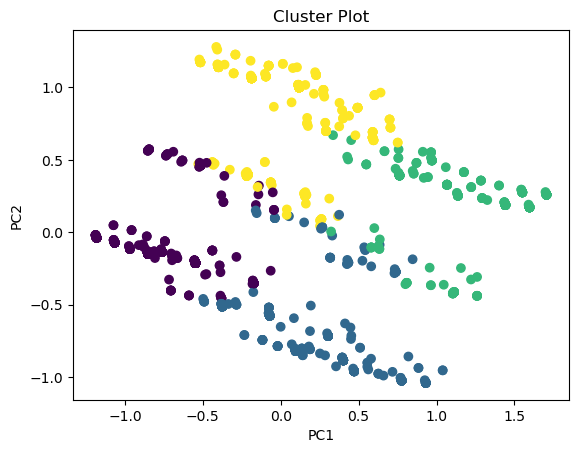

[[-0.47693349  0.36378978 -0.30444402  0.0551622  -0.30753507  0.17073819
  -0.28051863  0.01304117  0.57240278 -0.11028437  0.04543901]
 [-0.15533159  0.016414   -0.0625153  -0.14242496  0.27760805 -0.34783006
  -0.05973793 -0.11307868 -0.01846534 -0.66581756 -0.54161635]
 [-0.00635636  0.01880869 -0.03701866  0.19761927  0.07062017 -0.3550866
   0.70763705  0.37593402  0.40027977 -0.07563413  0.14172992]
 [ 0.11623168 -0.03409395 -0.32235949 -0.35413876 -0.07340475 -0.40651542
  -0.38594277  0.58962241 -0.16051227 -0.00533813  0.25090987]
 [ 0.3044427  -0.06383884 -0.80237317  0.2539601   0.36139895  0.20934711
   0.03616962 -0.13824084 -0.00284738  0.00870725  0.00164229]
 [-0.10849325 -0.0869722  -0.06464172 -0.09736269  0.10793025 -0.59463206
  -0.08684577 -0.62779877  0.16619659  0.23953197  0.33926454]
 [-0.33718593 -0.61063276 -0.14931026  0.11895823 -0.12897259 -0.10324067
  -0.04044934  0.14006047  0.07606907  0.42808739 -0.48928285]
 [-0.47151394  0.3073178  -0.28726479 -0.0

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have already performed PCA on your data and obtained MD_pca

# Fit a clustering model (e.g., K-means) on the projected data
kmeans = KMeans(n_clusters=4)  # Specify the desired number of clusters
cluster_labels = kmeans.fit_predict(MD_pca)

# Plot the projected data with cluster labels
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=cluster_labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cluster Plot')
plt.show()

# Get the projection axes (principal components)
projection_axes = pca.components_.T

print(projection_axes)


Step 7: Describing Segments - now going to like attribute check the behavior of 4 segments

In [59]:
like_counts = pd.value_counts(mcdonalds['Like'])
reversed_counts = like_counts.iloc[::-1]

print(reversed_counts)

-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: Like, dtype: int64


In [60]:
like_mapping = {
    'I hate it!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '+1': 1,
    '+2': 2,
    '+3': 3,
    '+4': 4,
    'I love it!+5': 5
}

mcdonalds['Like.n'] = mcdonalds['Like'].map(like_mapping)


like_n_counts = mcdonalds['Like.n'].value_counts()


print(like_n_counts)

 3    229
 2    187
 0    169
 4    160
 1    152
-5    152
 5    143
-3     73
-4     71
-2     59
-1     58
Name: Like.n, dtype: int64


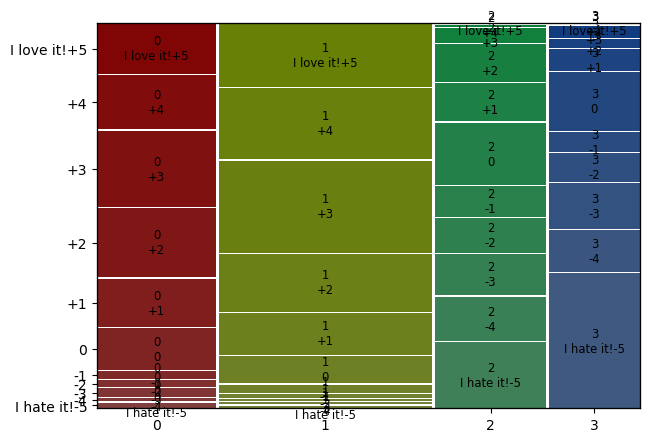

In [62]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
#Label encoding for categorical - Converting 11 cols with yes/no
data1=pd.read_csv("mcdonalds.csv")

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    data1[x] = LabelEncoder().fit_transform(data1[x])
    return data1

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
data1
df_eleven = data1.loc[:,cat]
df_eleven
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
data1['cluster_num'] = kmeans.labels_ 
crosstab =pd.crosstab(data1['cluster_num'],data1['Like'])
#Reordering cols
data1
crosstab = crosstab[[ 'I hate it!-5','-4','-3','-2','-1','0','+1','+2','+3','+4','I love it!+5']]
crosstab 
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

It indicate that 0,1 like and 2,3 segment people dont like .

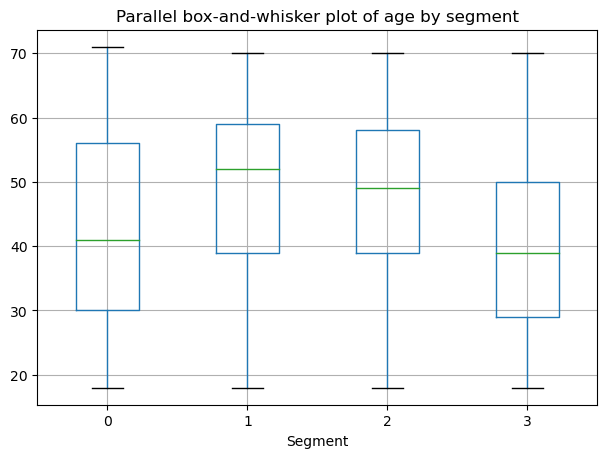

In [64]:
df = pd.DataFrame({'Segment': k4, 'Age': mcdonalds['Age']})

df.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()

 Step 8: Selecting (the) Target Segment(s)

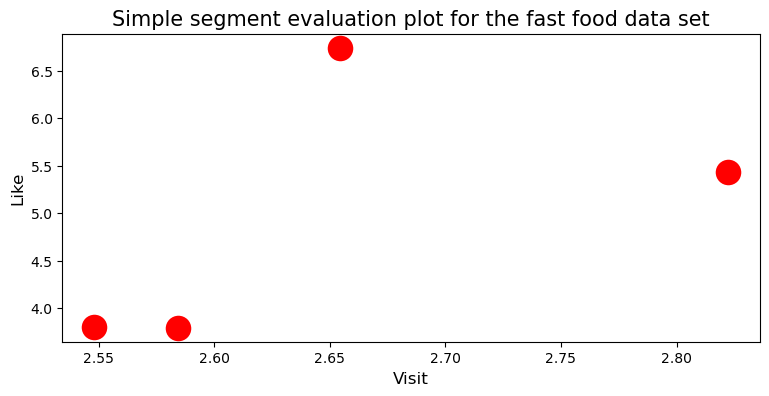

In [65]:
data1['Gender'] = LabelEncoder().fit_transform(data1['Gender'])
Gender = data1.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
data1['Like'] = LabelEncoder().fit_transform(data1['Like'])
Like = data1.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
data1['VisitFrequency'] = LabelEncoder().fit_transform(data1['VisitFrequency'])
visit = data1.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
import seaborn as sns
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()



Step 9: Customising the Marketing Mix

McDonald's customizes its marketing mix for specific target segments. For example, if they want to focus on young customers who find their food tasty but consider it expensive, they may introduce a budget-friendly product line called MCSUPERBUDGET (Price). They would differentiate this line from their main products (Product) and promote it through channels preferred by this segment (Promotion). The distribution channels would remain the same, but they may consider a separate queue for MCSUPERBUDGET customers (Place). The goal is to attract and retain customers in this segment while ensuring it doesn't impact the main product line.

 Step 10: Evaluation and Monitoring
 
After conducting the market segmentation analysis and implementing marketing strategies, it's essential to evaluate the success of the segmentation and continuously monitor the market for changes. This allows McDonald's to adapt its marketing approach in response to new circumstances, such as shifts in customer preferences or the entry of competitors. Regular monitoring helps maintain a competitive edge and ensures effective marketing strategies.